# Test

The following blocks runs prediction on a validation dataset over the trained model by plotting scores, confusion matrix and 2 graphs (accuracy distribution between classes and the confidence over the predictions).

The graphs were used to adjust manually the class weights during trainings.

In [1]:
# Importing drive for Google Colab
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_large (Functional)          │ (None, 3, 3, 1536)          │     196,230,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 255,604,826 (975.06 MB)

 Trainable params: 29,260,424 (111.62 MB)

 Non-trainable params: 167,823,552 (640.20 MB)

 Optimizer params: 58,520,850 (223.24 MB)

73/73 ━━━━━━━━━━━━━━━━━━━━ 60s 717ms/step

Prediction confidence analysis for sample predictions:
Sample 1: Predicted class = 0, Confidence = 0.9999
Class probabilities: [9.9988961e-01 9.6375508e-08 2.0068208e-07 1.0199821e-04 3.9406964e-07
 6.4652445e-06 1.1594231e-06 4.2633943e-08]

Sample 2: Predicted class = 0, Confidence = 0.9999
Class probabilities: [9.9985850e-01 2.6878288e-06 6.5093491e-07 1.1663483e-04 5.7346602e-07
 9.0292688e-06 8.6974187e-06 3.2085607e-06]

Sample 3: Predicted class = 0, Confidence = 0.9989
Class probabilities: [9.9893945e-01 5.5317122e-07 1.9023671e-06 1.0181284e-03 2.2173454e-06
 2.7411113e-05 9.9649260e-06 2.6710234e-07]

Sample 4: Predicted class = 0, Confidence = 0.9996
Class probabilities: [9.99646902e-01 2.59733242e-05 7.17270950e-07 2.90962489e-04
 8.54145810e-07 7.30499414e-06 2.70708260e-05 1.18831785e-07]

Sample 5: Predicted class = 0, Confidence = 0.9807
Class probabilities: [9.8072076e-01 1.2398096e-06 3.9403418e-05 1.8806893e-02 3.3905373e-05

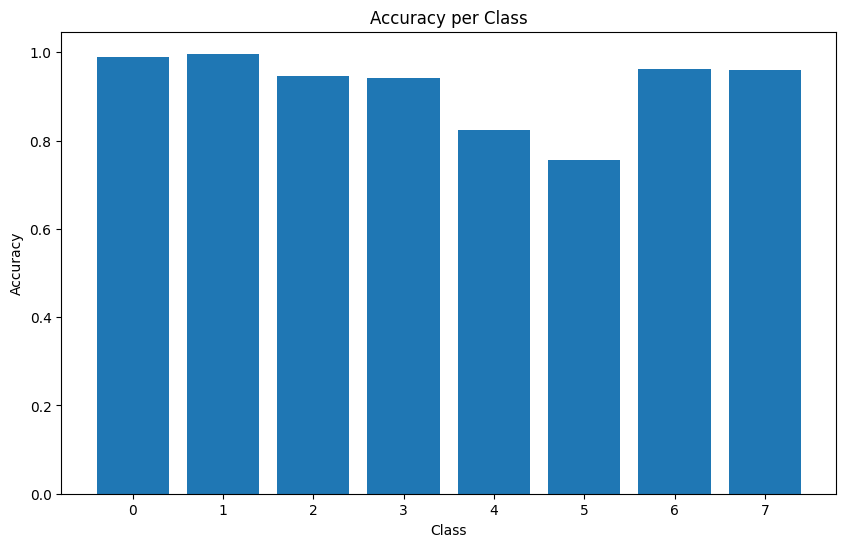

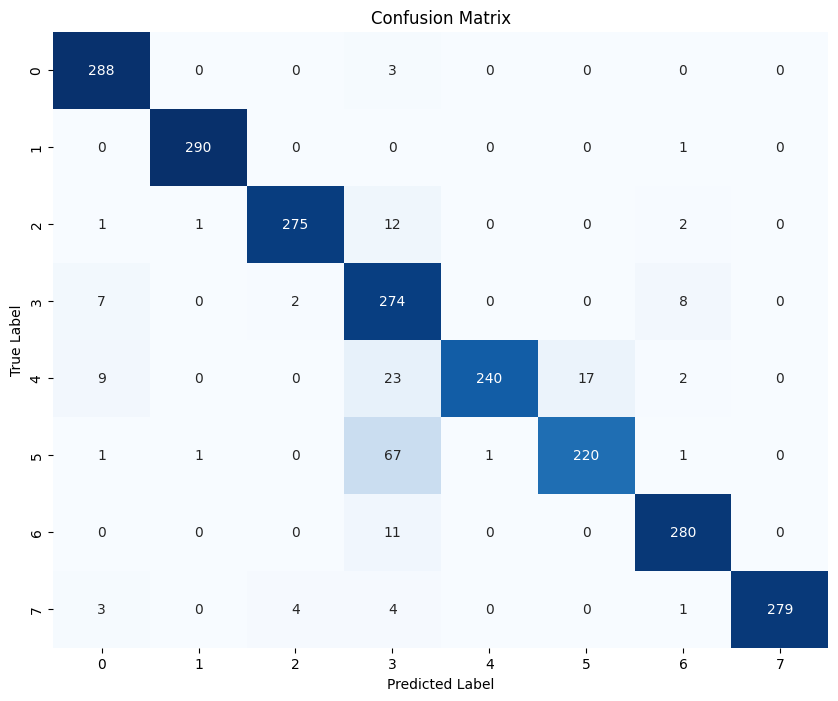

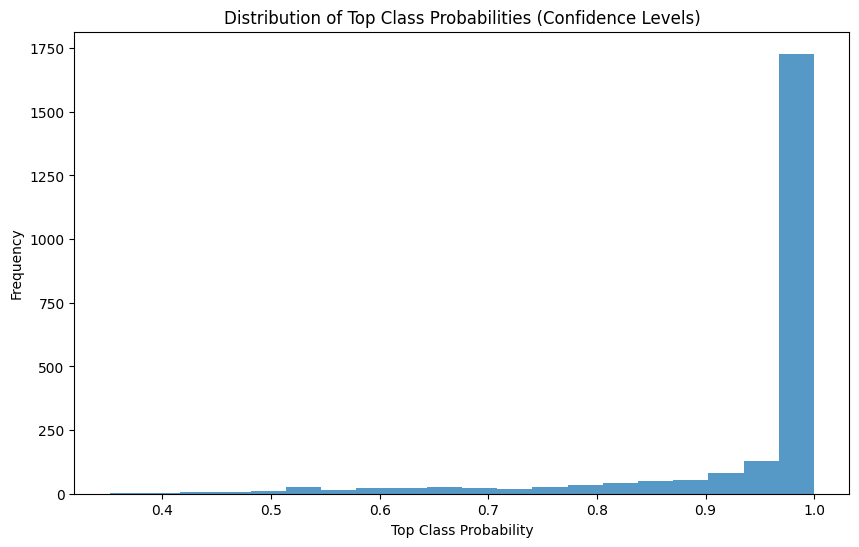

   precision    recall  f1-score
0   0.932039  0.989691  0.960000
1   0.993151  0.996564  0.994854
2   0.978648  0.945017  0.961538
3   0.695431  0.941581  0.800000
4   0.995851  0.824742  0.902256
5   0.928270  0.756014  0.833333
6   0.949153  0.962199  0.955631
7   1.000000  0.958763  0.978947


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

# BLOCK 1: Load the Test Data
def load_test_data(file_path):
    data = np.load(file_path)
    X_test = data['images']
    y_test = data['labels'].flatten()
    return X_test, y_test

# BLOCK 2: Load Model and Run Inference with Confidence Analysis
def run_inference_with_confidence(model_path, X_test, num_samples=10):
    model = tf.keras.models.load_model(model_path)
    model.summary()
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    confidences = np.max(y_pred, axis=1)

    # Display the confidence values for the first few samples
    print("\nPrediction confidence analysis for sample predictions:")
    for i in range(num_samples):
        print(f"Sample {i + 1}: Predicted class = {y_pred_classes[i]}, Confidence = {confidences[i]:.4f}")
        print("Class probabilities:", y_pred[i])
        print()

    return y_pred_classes, confidences

# BLOCK 3: Calculate Metrics
def calculate_metrics(y_test, y_pred_classes):
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f'Overall Accuracy: {accuracy * 100:.2f}%')
    report = classification_report(y_test, y_pred_classes, output_dict=True)
    return accuracy, report

# BLOCK 4: Plot Accuracy for Each Class
def plot_class_accuracy(report):
    class_accuracies = [report[str(i)]['recall'] for i in range(len(report) - 3)]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(class_accuracies)), class_accuracies)
    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per Class')
    plt.show()

# BLOCK 5: Plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred_classes):
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# BLOCK 6: Plot Confidence Distribution
def plot_confidence_distribution(confidences):
    plt.figure(figsize=(10, 6))
    plt.hist(confidences, bins=20, alpha=0.75)
    plt.xlabel("Top Class Probability")
    plt.ylabel("Frequency")
    plt.title("Distribution of Top Class Probabilities (Confidence Levels)")
    plt.show()

# BLOCK 7: Display Results Table
def display_results_table(report):
    report_df = pd.DataFrame(report).transpose()
    display_df = report_df[['precision', 'recall', 'f1-score']].iloc[:-3]
    print(display_df)
    return display_df

if __name__ == "__main__":
    # File paths
    npz_file_path = '/content/drive/MyDrive/Homework1/dataset/npz_NoTestSet/filtered_classes_noOutliears/val_set.npz'
    model_path = '/content/drive/MyDrive/Homework1/net_output/ConvNext/ConvNext_10Unfreezed_epoch09_FullSet_SoftCutMixAug_withColorDegradation_LRPlateau_FineTuning.keras'

    # Load data and run inference
    X_test, y_test = load_test_data(npz_file_path)
    y_pred_classes, confidences = run_inference_with_confidence(model_path, X_test)

    # Calculate metrics and plot results
    accuracy, report = calculate_metrics(y_test, y_pred_classes)
    plot_class_accuracy(report)
    plot_confusion_matrix(y_test, y_pred_classes)
    plot_confidence_distribution(confidences)
    display_results_table(report)
